# Exploratory Data Analysis (EDA) - Chest X-Ray Images

This notebook performs EDA on the raw image data used for the Respiratory Disease Classification project.

## 1. Setup and Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
import random

# Configure plots
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

## 2. Define Constants and Load Data

In [2]:
# Define path to the raw data directory (relative to the project root)
DATA_PATH = Path("../raw_data")

# Define class names based on project context
CLASS_NAMES = ["COVID-19", "Lung-Opacity", "Normal", "Viral Pneumonia", "Tuberculosis"]

# Function to load data from npz file
def load_npz_data(file_path):
    try:
        data = np.load(file_path)
        images = data['image'] # Keep original dtype for now
        labels = data['image_label'].astype(np.int64).squeeze()
        print(f"Loaded {len(images)} images and {len(labels)} labels from {file_path.name}")
        return images, labels
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None, None
    except Exception as e:
        print(f"Error loading {file_path.name}: {e}")
        return None, None

# Load train, validation, and test sets
train_images, train_labels = load_npz_data(DATA_PATH / "Dataset5_raw_train.npz")
val_images, val_labels = load_npz_data(DATA_PATH / "Dataset5_raw_val.npz")
test_images, test_labels = load_npz_data(DATA_PATH / "Dataset5_raw_test.npz")

# Combine data for overall analysis (optional, but useful)
if train_images is not None and val_images is not None and test_images is not None:
    all_images = np.concatenate((train_images, val_images, test_images), axis=0)
    all_labels = np.concatenate((train_labels, val_labels, test_labels), axis=0)
    print(f"\nCombined total images: {len(all_images)}")
else:
    print("\nCould not load all datasets. Combined analysis will be skipped.")
    all_images, all_labels = None, None

Loaded 19610 images and 19610 labels from Dataset5_raw_train.npz
Loaded 6534 images and 6534 labels from Dataset5_raw_val.npz
Loaded 6540 images and 6540 labels from Dataset5_raw_test.npz

Combined total images: 32684


## 3. Basic Information & Data Range Check

In [3]:
if train_images is not None:
    print(f"\n--- Training Set ---")
    print(f"Number of images: {train_images.shape[0]}")
    print(f"Image shape: {train_images.shape[1:]}") # H, W, C
    print(f"Image data type: {train_images.dtype}")
    # Check data range if float
    if np.issubdtype(train_images.dtype, np.floating):
        print(f"Image data range (min/max): {np.min(train_images):.2f} / {np.max(train_images):.2f}")
    print(f"Label data type: {train_labels.dtype}")
    print(f"Label shape: {train_labels.shape}")

if val_images is not None:
    print(f"\n--- Validation Set ---")
    print(f"Number of images: {val_images.shape[0]}")

if test_images is not None:
    print(f"\n--- Test Set ---")
    print(f"Number of images: {test_images.shape[0]}")

if all_images is not None:
    print(f"\n--- Combined Set ---")
    print(f"Total images: {all_images.shape[0]}")
    print(f"Image shape: {all_images.shape[1:]}")
    print(f"Image data type: {all_images.dtype}")
    if np.issubdtype(all_images.dtype, np.floating):
        print(f"Combined image data range (min/max): {np.min(all_images):.2f} / {np.max(all_images):.2f}")


--- Training Set ---
Number of images: 19610
Image shape: (224, 224, 3)
Image data type: float64
Image data range (min/max): 0.00 / 255.00
Label data type: int64
Label shape: (19610,)

--- Validation Set ---
Number of images: 6534

--- Test Set ---
Number of images: 6540

--- Combined Set ---
Total images: 32684
Image shape: (224, 224, 3)
Image data type: float64
Combined image data range (min/max): 0.00 / 255.00


## 4. Class Distribution


Class Distribution (Combined):
COVID-19            4186
Lung-Opacity        6012
Normal             10192
Viral Pneumonia     7397
Tuberculosis        4897
Name: count, dtype: int64


C:\Users\sem_w\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sem_w\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sem_w\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


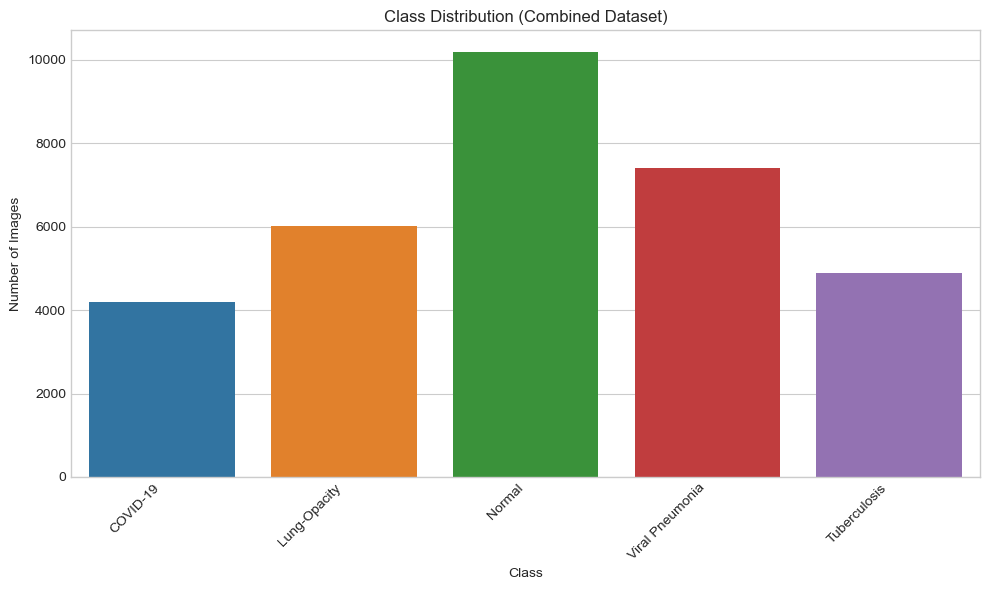

In [4]:
if all_labels is not None:
    label_counts = pd.Series(all_labels).value_counts().sort_index()
    label_counts.index = [CLASS_NAMES[i] for i in label_counts.index]

    print("\nClass Distribution (Combined):")
    print(label_counts)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=label_counts.index, y=label_counts.values)
    plt.title('Class Distribution (Combined Dataset)')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Cannot analyze class distribution as combined data is not available.")

## 5. Image Visualization (Corrected for Float Data)


Displaying sample images from Training Set:


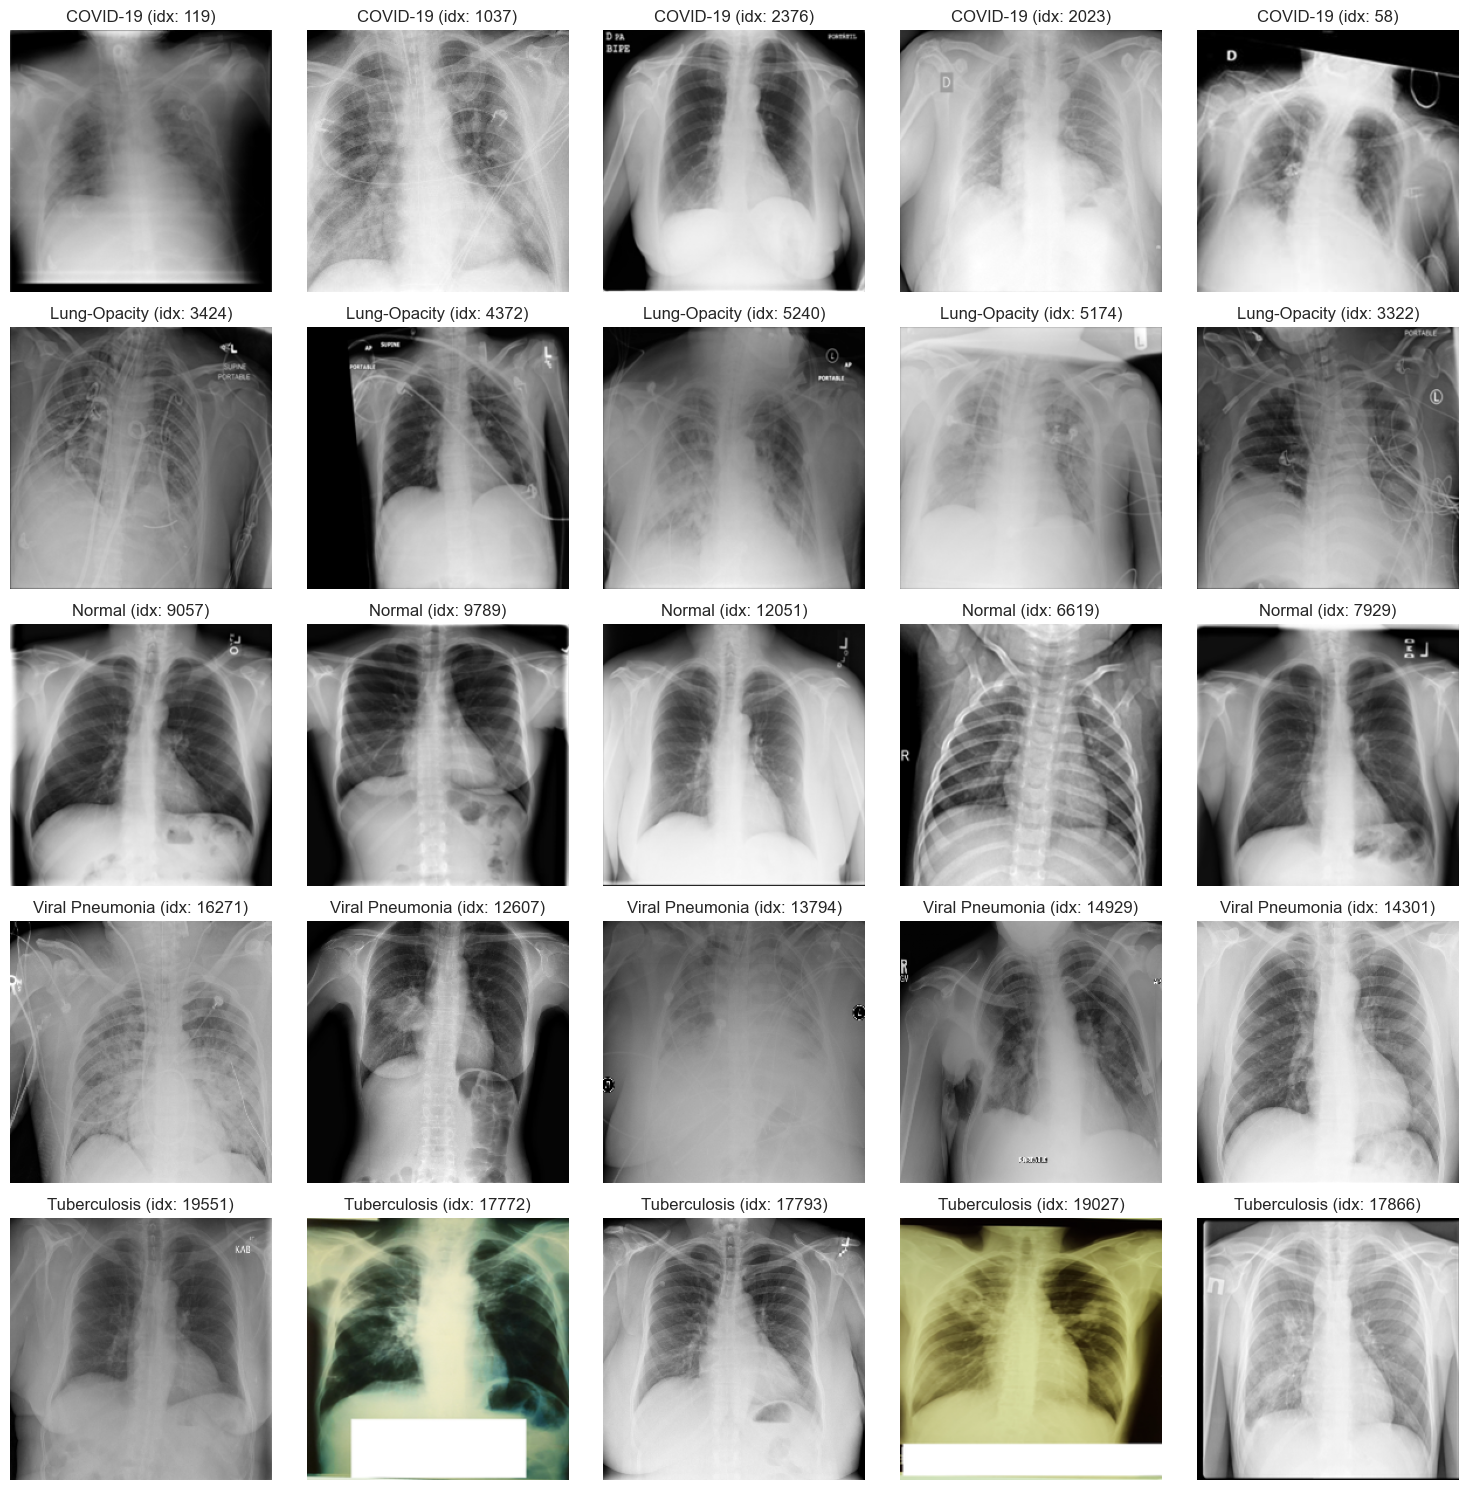

In [5]:
def display_sample_images(images, labels, class_names, n_samples=5):
    if images is None or labels is None:
        print("Data not available for visualization.")
        return
    
    num_classes = len(class_names)
    plt.figure(figsize=(15, n_samples * 3))
    
    for i, class_name in enumerate(class_names):
        # Find indices for the current class
        class_indices = np.where(labels == i)[0]
        if len(class_indices) == 0:
            print(f"No samples found for class: {class_name}")
            continue
            
        # Select random samples
        sample_indices = random.sample(list(class_indices), min(n_samples, len(class_indices)))
        
        for j, idx in enumerate(sample_indices):
            plt.subplot(num_classes, n_samples, i * n_samples + j + 1)
            img = images[idx]
            
            # Prepare image for display based on dtype
            if np.issubdtype(img.dtype, np.floating):
                # Normalize float data to [0, 1] for display
                img_min = np.min(img)
                img_max = np.max(img)
                if img_max > img_min:
                    img_display = (img - img_min) / (img_max - img_min)
                else:
                    img_display = np.zeros_like(img) # Avoid division by zero if max == min
                img_display = np.clip(img_display, 0, 1) # Ensure range
            elif np.issubdtype(img.dtype, np.integer):
                # Assume integer is likely 0-255
                img_display = img.astype(np.uint8)
            else:
                # Fallback for unknown types
                img_display = img 
                
            # Display image
            if img_display.shape[2] == 1: # Grayscale
                plt.imshow(img_display.squeeze(), cmap='gray', vmin=0, vmax=1 if np.issubdtype(img_display.dtype, np.floating) else 255)
            else: # Color
                plt.imshow(img_display)
                
            plt.title(f"{class_name} (idx: {idx})")
            plt.axis('off')
            
    plt.tight_layout()
    plt.show()

# Display samples from the training set
print("\nDisplaying sample images from Training Set:")
display_sample_images(train_images, train_labels, CLASS_NAMES)

## 6. Pixel Value Analysis


Analyzing pixel value distribution (Training Set Sample):


C:\Users\sem_w\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sem_w\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


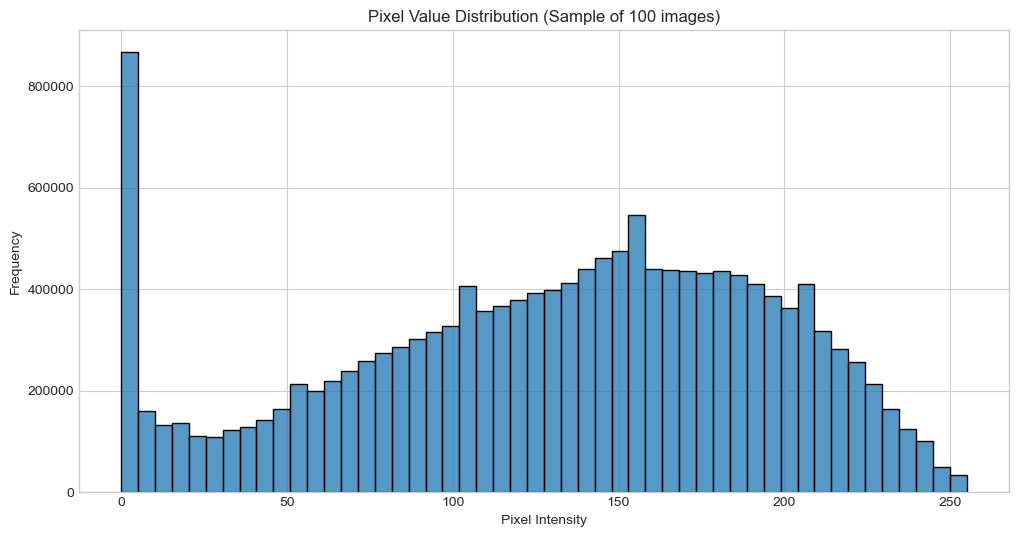

Pixel value stats (sample): Min=0.0, Max=255.0, Mean=130.39, Std=64.39


In [6]:
def plot_pixel_distribution(images, n_samples=100):
    if images is None:
        print("Images not available for pixel analysis.")
        return
        
    # Select a random subset of images for efficiency
    if len(images) > n_samples:
        sample_indices = random.sample(range(len(images)), n_samples)
        sampled_images = images[sample_indices]
    else:
        sampled_images = images
        
    # Flatten pixel values
    pixel_values = sampled_images.flatten()
    
    plt.figure(figsize=(12, 6))
    sns.histplot(pixel_values, bins=50, kde=False)
    plt.title(f'Pixel Value Distribution (Sample of {len(sampled_images)} images)')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()
    
    print(f"Pixel value stats (sample): Min={np.min(pixel_values)}, Max={np.max(pixel_values)}, Mean={np.mean(pixel_values):.2f}, Std={np.std(pixel_values):.2f}")

# Plot distribution for a sample from the training set
print("\nAnalyzing pixel value distribution (Training Set Sample):")
plot_pixel_distribution(train_images)